## Acoustics Toolbox
@Copyright Xingzihan 

导入

In [1]:
import arlpy.uwapm as pm
import arlpy.plot as plt
import numpy as np
pm.models()

['bellhop']

使用`pm.create_env2d()`创建海底环境

In [2]:
env = pm.create_env2d()
pm.print_env(env)

                name : arlpy
   bottom_absorption : 0.1
      bottom_density : 1600
    bottom_roughness : 0
   bottom_soundspeed : 1600
               depth : 25
        depth_interp : linear
           frequency : 25000
           max_angle : 80
           min_angle : -80
              nbeams : 0
            rx_depth : 10
            rx_range : 1000
          soundspeed : 1500
   soundspeed_interp : spline
             surface : None
      surface_interp : linear
            tx_depth : 5
   tx_directionality : None
                type : 2D


绘制海底环境

In [3]:
pm.plot_env(env, width=900)

`pm.compute_eigenrays(env)`计算本征声线

In [4]:
rays = pm.compute_eigenrays(env)
pm.plot_rays(rays, env=env, width=900)

`pm.compute_arrivals(env)`计算到达的信号

In [5]:
arrivals = pm.compute_arrivals(env)
pm.plot_arrivals(arrivals, width=900)

`arrivals`是pandas类型，可以取前10个进行计算

In [6]:
arrivals[arrivals.arrival_number < 10][['time_of_arrival', 'angle_of_arrival', 'surface_bounces', 'bottom_bounces']]

time_of_arrival  angle_of_arrival  surface_bounces  bottom_bounces
1          0.721796         22.538254                9               8
2          0.716791        -21.553932                8               8
3          0.709687         20.084017                8               7
4          0.709687         20.052010                8               7
5          0.705226        -19.034414                7               7
6          0.698960         17.484421                7               6
7          0.695070        -16.436060                6               6
8          0.689678         14.842224                6               5
9          0.686383        -13.766296                5               5
10         0.681901         12.133879                5               4

计算单位脉冲响应

In [7]:
ir = pm.arrivals_to_impulse_response(arrivals, fs=96000)
plt.plot(np.abs(ir), fs=96000, width=900)

计算传播损失

In [8]:

tloss = pm.compute_transmission_loss(env, mode='incoherent')
pm.plot_transmission_loss(tloss, env=env, width=900)

## tftb工具箱进行信号处理

In [14]:
import tftb
dir(tftb)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'generators',
 'processing',
 'utils']

模糊函数
- 窄带模糊函数

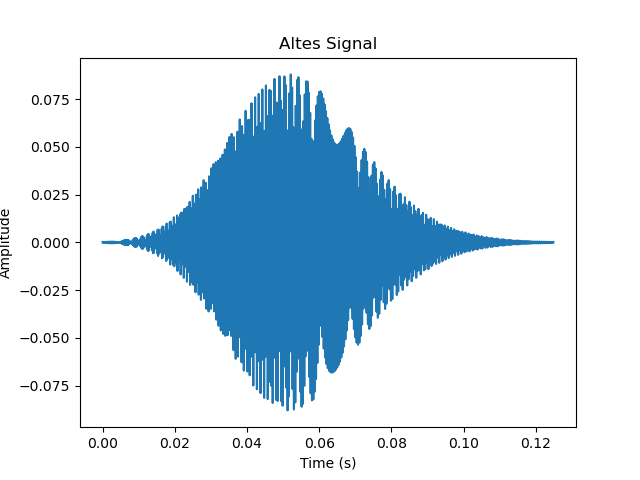

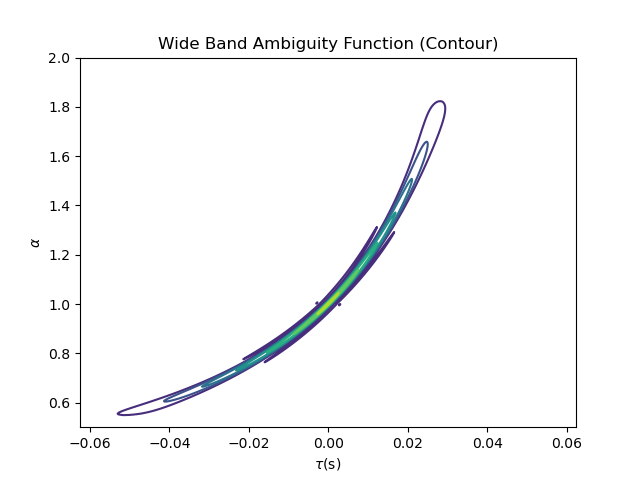

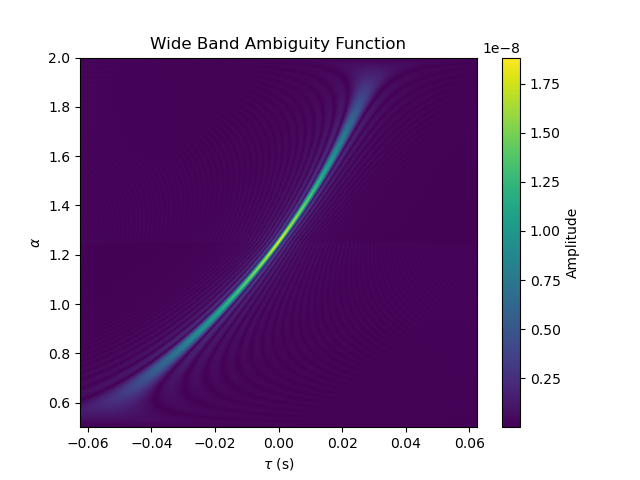

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from tftb.processing.ambiguity import wide_band



from tftb.generators import altes

def plot_altes_signal():
    SampleNum = 1000
    fmin,fmax = 1000,2000
    fs = 8000
    f_limit = fs/2
    t = np.arange(SampleNum)/fs

    fmin_norm,fmax_norm = fmin/f_limit,fmax/f_limit

    signal = altes(SampleNum, fmin_norm,fmax_norm)

    plt.figure()
    plt.plot(t,signal)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Altes Signal')
    plt.show()


    waf, tau, log_theta = wide_band(signal, 0.1, 0.2, SampleNum)
    tau = tau*(1/fs)
    alpha = np.exp(log_theta)

    #等高线图
    plt.figure()
    plt.contour(tau, alpha, np.abs(waf))
    plt.xlabel(r"$\tau$(s)")
    plt.ylabel(r"$\alpha$")
    plt.title("Wide Band Ambiguity Function (Contour)")
    #plt.colorbar()
    plt.show()

    #热图
    plt.figure()
    plt.imshow(np.abs(waf), 
            extent=[tau[0], tau[-1], alpha[0], alpha[-1]],
            aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Amplitude')
    plt.xlabel(r'$\tau$ (s)')
    plt.ylabel(r'$\alpha$')
    plt.title("Wide Band Ambiguity Function")
    plt.show()
plot_altes_signal()



`if_law`时间变化的归一频率

`fmodany()`

In [ ]:
from tftb.generators import fmlin
from tftb.generators.frequency_modulated import fmodany

SampleNum = 1000
fmin,fmax = 1000,2100
fs = 8000
f_limit = fs
t = np.arange(SampleNum)/fs

fmin_norm,fmax_norm = fmin/f_limit,fmax/f_limit

y,f_norm = fmlin(SampleNum,fmin_norm,fmax_norm)#fmax_norm最大为0.5  归一化频率时的分母是fs
signal = fmodany(f_norm)
t = np.arange(SampleNum)/fs

plt.figure()
plt.plot(t,signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('LFM Signal')
plt.show()

时频变换

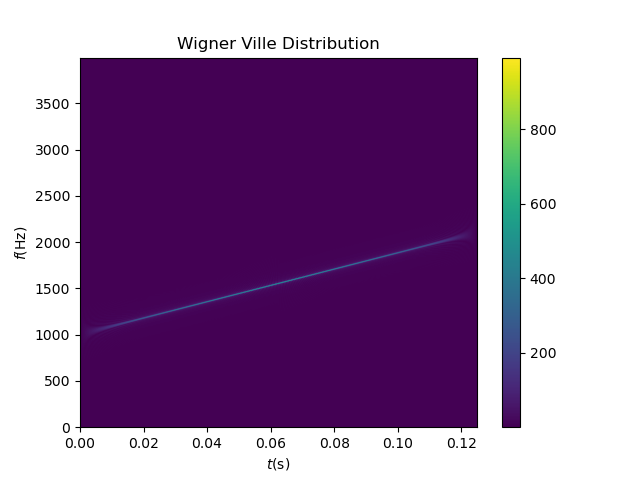

In [113]:
from tftb.processing import WignerVilleDistribution
# wvd = WignerVilleDistribution(signal)
# amp,time_num,freq_norm = wvd.run()
# t = time_num*(1/fs)
# f = freq_norm*fs

# wvd.run()
# # 不指定 ax，让 tftb 自己处理
# wvd.plot(kind='cmap', cmap='viridis')
# # 获取当前的 axes
# ax=plt.gca()
# plt.colorbar(ax.images[0])

wvd = WignerVilleDistribution(signal)
amp,time_num,freq_norm = wvd.run()
t = time_num*(1/fs)
f = freq_norm*fs

plt.figure()
plt.imshow(np.abs(amp), 
            extent=[t[0],t[-1],f[0],f[-1]],
            aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.xlabel(r'$t$(s)')
plt.ylabel(r'$f$(Hz)')
plt.title("Wigner Ville Distribution");

m序列

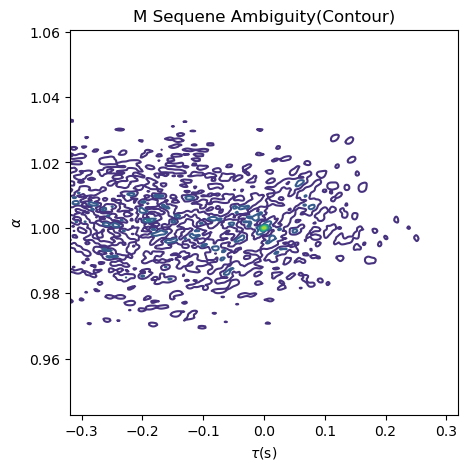

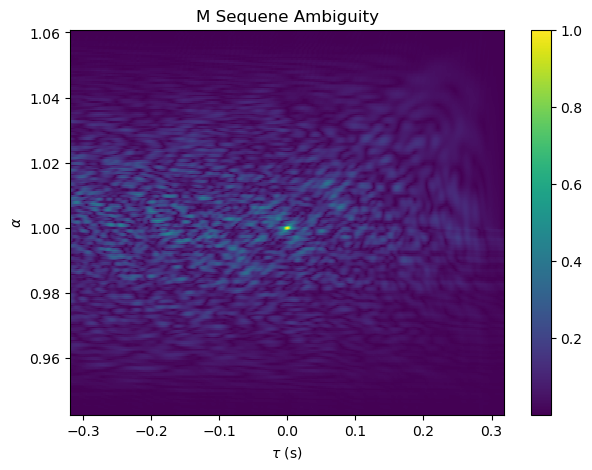

In [84]:
from module.seqence import m_seq
import numpy as np
import matplotlib.pyplot as plt

gen_435 = [1, 0, 0, 0, 1, 1, 1, 0, 1]  # x^8 + x^4 + x^3 + x^2 + 1
init_state = [1, 0, 1, 0, 1, 0, 1, 0]   # 8位初始状态，必须非零
    
# 生成m序列
M_array = m_seq(gen_435, init_state)
M_array = M_array*2-1

fs = 8000
fmax = fs
fc  = 2000

total_time = 0.635  # 总时间（秒）
N = len(M_array)
T_pulse = total_time / N

sub_pulse_t = np.arange(0, T_pulse, 1/fs)

sub_pulse = np.exp(1j*2*np.pi*fc*sub_pulse_t)
sig = np.concatenate([sub_pulse * m for m in M_array])
t = np.arange(0, len(sig))/fs


# plt.figure(figsize=(10, 5))
# plt.plot(t,sig.real)
# plt.show()

#绘制模糊函数
from tftb.processing.ambiguity import wide_band

waf, tau, log_theta = wide_band(sig, 0.33, 0.35, N)
tau = tau*(1/fs)
alpha = np.exp(log_theta)

TAU, ALPHA = np.meshgrid(tau, alpha)

    #等高线图
plt.figure(figsize=(5, 5))
plt.contour(tau, alpha, np.abs(waf)/np.max(np.abs(waf)))
plt.xlabel(r"$\tau$(s)")
plt.ylabel(r"$\alpha$")
plt.title("M Sequene Ambiguity(Contour)")
plt.show()


plt.figure(figsize=(7, 5))
#plt.imshow(np.abs(waf)/np.max(np.abs(waf)), 
#            extent=[tau[0], tau[-1], alpha[0], alpha[-1]],
#            aspect='auto', origin='lower', cmap='viridis')
plt.pcolormesh(TAU, ALPHA, np.abs(waf)/np.max(np.abs(waf)))
plt.colorbar()
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$\alpha$')
plt.title("M Sequene Ambiguity")
plt.show()

costas序列

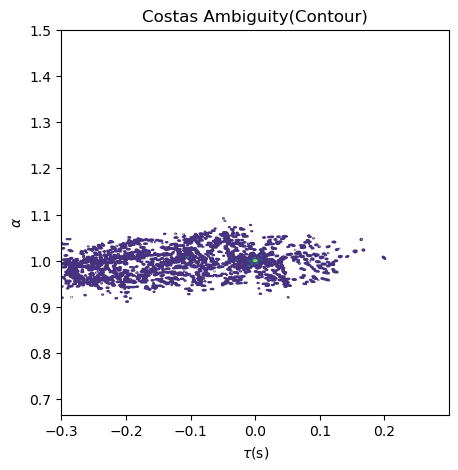

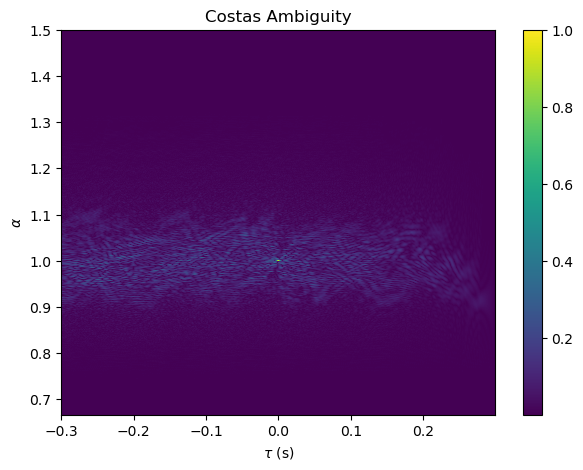

In [86]:
from module.seqence import costas_seq
costas_list, method_list = costas_seq(30, num=3)
costas_list,method_list

costas_array = costas_list[0]

fc = 2000
B = 200
f_hop = B/len(costas_array)
f_start = fc - B/2
duration = 0.6
N = int(duration*fs)
sub_t_len = duration/len(costas_array)

sub_t = np.arange(0,0.02, 1/fs)

sig = np.concatenate([np.exp(1j*2*np.pi*(f_start+i*f_hop)*sub_t) for i in costas_array])


#绘制模糊函数
from tftb.processing.ambiguity import wide_band

waf, tau, log_theta = wide_band(sig, 0.2, 0.3, N)
tau = tau*(1/fs)
alpha = np.exp(log_theta)
TAU, ALPHA = np.meshgrid(tau, alpha)

    #等高线图
plt.figure(figsize=(5, 5))
plt.contour(tau, alpha, np.abs(waf)/np.max(np.abs(waf)))
plt.xlabel(r"$\tau$(s)")
plt.ylabel(r"$\alpha$")
plt.title("Costas Ambiguity(Contour)")
plt.show()


plt.figure(figsize=(7, 5))
plt.pcolormesh(TAU, ALPHA, np.abs(waf)/np.max(np.abs(waf)))
plt.colorbar()
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$\alpha$')
plt.title("Costas Ambiguity")
plt.show()